# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd
student_data= pd.DataFrame({'Age':[17,51,27,21,36,48,19,26,54,30], 'Tardies':[10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

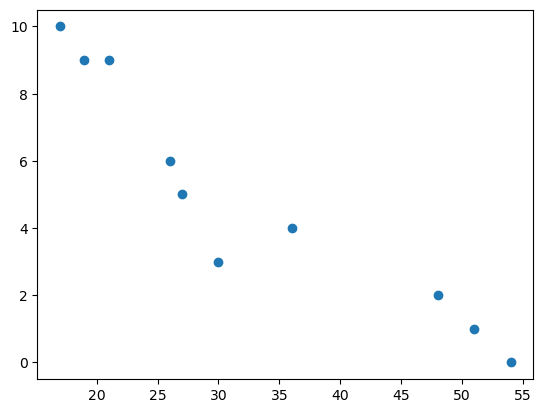

In [3]:
# Your code here.
import matplotlib.pyplot as plt
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# The older the students are, the less the lateness is

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
import numpy as np
#correlation:
print("Correlation is:", np.corrcoef(student_data['Age'], student_data['Tardies']))

#covariance:
print("Covariance is:", np.cov(student_data['Age'], student_data['Tardies']))

#Age and Tardies has a very strong and negative linear correlation

Correlation is: [[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
Covariance is: [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
result = model.fit(student_data[['Age']], student_data['Tardies'])
print(result.score(student_data[['Age']], student_data['Tardies']))
estimate_value = result.intercept_ + result.coef_[0]*student_data[['Age']]

0.8820265558250109


Plot your regression model on your scatter plot.

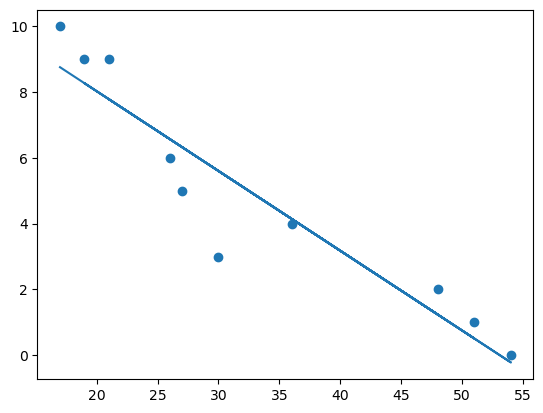

In [17]:
# Your code here.
plt.plot(student_data[['Age']], estimate_value)
plt.scatter(student_data[['Age']], student_data['Tardies'])
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#The R squred was calculated to be 0.88, which is very close to 1. In this case, we can confidently say that the model has a good fit to our training data. 
#In other words, Age is a good predictpr pf tardoness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
# Import any libraries you may need & the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [19]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [21]:
vehicles.describe()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
count,35952.00000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,2000.71640,3.338493,5.765076,17.609056,17.646139,23.880646,19.929322,475.316339,1892.598465
std,10.08529,1.359395,1.755268,4.467283,4.769349,5.890876,5.112409,119.060773,506.958627
min,1984.00000,0.600000,2.000000,0.060000,6.000000,9.000000,7.000000,37.000000,600.000000
25%,1991.00000,2.200000,4.000000,14.699423,15.000000,20.000000,16.000000,395.000000,1500.000000
50%,2001.00000,3.000000,6.000000,17.347895,17.000000,24.000000,19.000000,467.736842,1850.000000
75%,2010.00000,4.300000,6.000000,20.600625,20.000000,27.000000,23.000000,555.437500,2200.000000
max,2017.00000,8.400000,16.000000,47.087143,58.000000,61.000000,56.000000,1269.571429,5800.000000


In [24]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

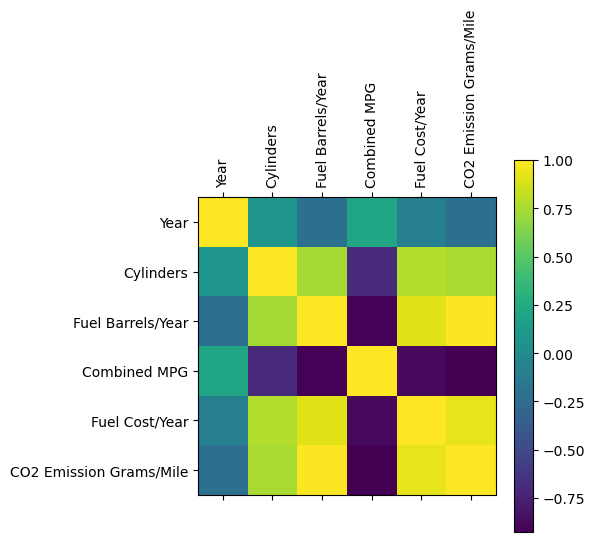

In [27]:
# Your response here. 
plt.matshow(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr())
plt.colorbar()
plt.xticks(range(6),vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].columns, rotation = 90)
plt.yticks(range(6),vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].columns)
plt.show()



In [ ]:
'''It seems that 'Fuel Barrels/Year'and 'Fuel Cost/Year'have extremely high correlation with COS Emmistion Grams/Mile and the coefficient is close to 1, which is common sense as the more fule barrels, the more CO2 emmistions there are, and the more cost it could be. 
 So those two alone do not really insterest me that much. 
 However, the cost per fuel barrel each year seems to be interesting for the investigation
 Secondly, 'Cylinders'and 'Combined MPG' have reletively high correlation with the target, around 0.75 and -0.75.
 Before the further model generation, we can already drop 'Year' as it does not have high correlation'''

In [36]:
vehicles['Cost/Fuel Barrel'] = vehicles['Fuel Cost/Year'] / vehicles['Fuel Barrels/Year']
vehicles_noyear = vehicles.drop(columns=['Year','Fuel Cost/Year', 'Fuel Barrels/Year'])
vehicles_noyear.head()

,Make,Model,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Cost/Fuel Barrel
0,AM General,DJ Po Vehicle 2WD,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,18,17,17,522.764706,100.573405
1,AM General,FJ8c Post Office,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,13,13,683.615385,100.573405
2,AM General,Post Office DJ5 2WD,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,17,16,555.437500,101.938655
3,AM General,Post Office DJ8 2WD,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,13,13,683.615385,100.573405
4,ASC Incorporated,GNX,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,14,21,16,555.437500,123.782652


In [38]:
vehicles_noyear.describe()
'''Cost/Fuel Barrel has a very high standard deviation, and the values are between 93 and 167. I want to standardize the column'''

,Engine Displacement,Cylinders,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Cost/Fuel Barrel
count,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000,35952.000000
mean,3.338493,5.765076,17.646139,23.880646,19.929322,475.316339,134.508779
std,1.359395,1.755268,4.769349,5.890876,5.112409,119.060773,663.252511
min,0.600000,2.000000,6.000000,9.000000,7.000000,37.000000,93.279433
25%,2.200000,4.000000,15.000000,20.000000,16.000000,395.000000,100.573405
50%,3.000000,6.000000,17.000000,24.000000,19.000000,467.736842,101.938655
75%,4.300000,6.000000,20.000000,27.000000,23.000000,555.437500,121.355541
max,8.400000,16.000000,58.000000,61.000000,56.000000,1269.571429,16666.666667


In [42]:
'''Since I want to include Cylinders and Combined MPG also in the exploration, I thought why not to do the standardization together since it does not really hurt'''
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
vehicles_noyear[['Std_Cost_Barrel', 'Std_Cylinders', 'Std_Combined_MPG']] = std_scaler.fit_transform(vehicles_noyear[['Cost/Fuel Barrel', 'Cylinders', 'Combined MPG']])
vehicles_noyear.head()

,Make,Model,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Cost/Fuel Barrel,Std_Cost_Barrel,Std_Cylinders,Std_Combined_MPG
0,AM General,DJ Po Vehicle 2WD,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,18,17,17,522.764706,100.573405,-0.051166,-1.005601,-0.572991
1,AM General,FJ8c Post Office,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,13,13,683.615385,100.573405,-0.051166,0.133841,-1.355412
2,AM General,Post Office DJ5 2WD,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,17,16,555.437500,101.938655,-0.049107,-1.005601,-0.768596
3,AM General,Post Office DJ8 2WD,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,13,13,683.615385,100.573405,-0.051166,0.133841,-1.355412
4,ASC Incorporated,GNX,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,14,21,16,555.437500,123.782652,-0.016172,0.133841,-0.768596


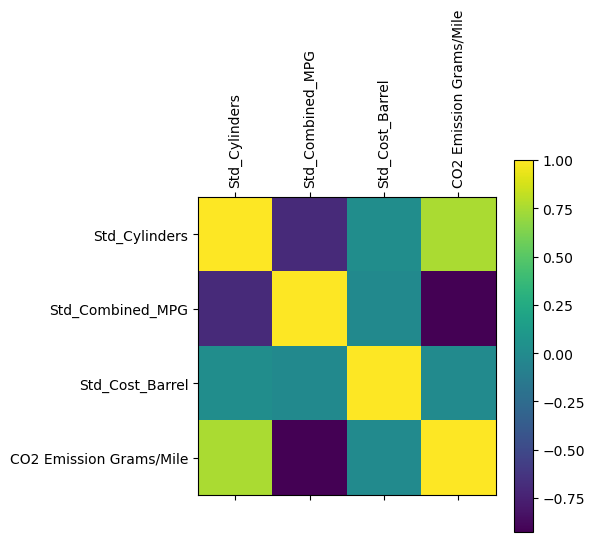

In [44]:
'''Try the heat map again'''
plt.matshow(vehicles_noyear[['Std_Cylinders', 'Std_Combined_MPG', 'Std_Cost_Barrel', 'CO2 Emission Grams/Mile']].corr())
plt.colorbar()
plt.xticks(range(4),vehicles_noyear[['Std_Cylinders', 'Std_Combined_MPG', 'Std_Cost_Barrel', 'CO2 Emission Grams/Mile']].columns, rotation = 90)
plt.yticks(range(4),vehicles_noyear[['Std_Cylinders', 'Std_Combined_MPG', 'Std_Cost_Barrel', 'CO2 Emission Grams/Mile']].columns)
plt.show()

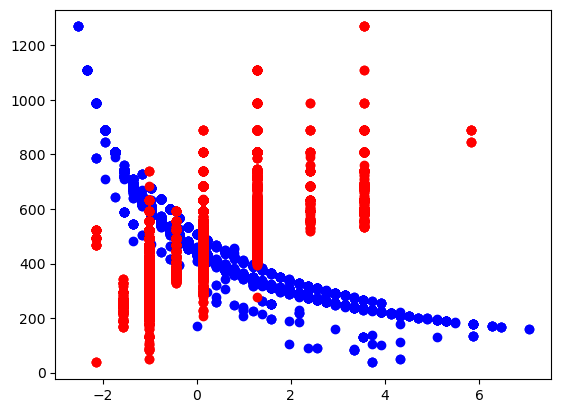

In [55]:
'''Okay. So Std_Cost_Barrel does not really have a high correlation with CO2 emmission, which leaves us the Std_Cylinders and Std_Combined_MPG'''
plt.scatter(vehicles_noyear['Std_Combined_MPG'], vehicles_noyear['CO2 Emission Grams/Mile'], c='b')
plt.scatter(vehicles_noyear['Std_Cylinders'], vehicles_noyear['CO2 Emission Grams/Mile'], c='r')
plt.show()

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [58]:
# Your response here. 
model = LinearRegression()
result = model.fit(vehicles_noyear[['Std_Combined_MPG', 'Std_Cylinders']], vehicles_noyear['CO2 Emission Grams/Mile'])
display(result.coef_)
'''Std_Cylinders increases, the CO2 emission also increases, which means the two variables are positively correlated, and for the other variable Std_Combined_MPG, it has a negative correlation with the CO2 emission, but it alone does not have a linear regression tendency '''
'''We try first with multiple linear regression'''

array([-93.16765581,  24.48781002])

'We try first with multiple linear regression'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

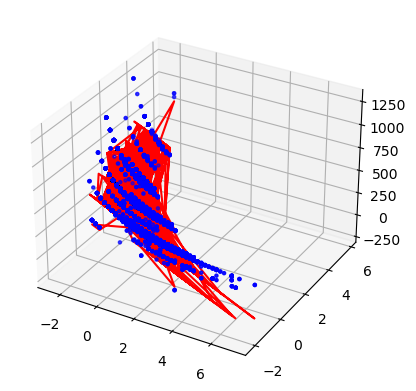

In [68]:
regression_line = result.intercept_+ result.coef_[0]* vehicles_noyear['Std_Combined_MPG'] + result.coef_[1]*vehicles_noyear['Std_Cylinders']

ax = plt.axes(projection ="3d")
ax.plot3D(vehicles_noyear['Std_Combined_MPG'], vehicles_noyear['Std_Cylinders'], regression_line, c = 'red')
ax.scatter3D(vehicles_noyear['Std_Combined_MPG'], vehicles_noyear['Std_Cylinders'], vehicles_noyear['CO2 Emission Grams/Mile'], c ="blue", s = 5)
plt.show()

In [51]:
# Your response here. 

print("Estimated CO2 Emission Grams/Mile =", result.intercept_, "+", result.coef_[0], "*", "Std_Combined_MPG", "+", result.coef_[1], "*", 'Std_Cylinders')
print(result.score(vehicles_noyear[['Std_Combined_MPG', 'Std_Cylinders']], vehicles_noyear['CO2 Emission Grams/Mile']))
'''R2 by using the two variables as independent variables is very high, which indicates the model we built by using 'Std_Combined_MPG' and 'Std_Cylinders' as our predictors' for 'CO2 Emission Grams/Mile' can explain more than 87% of the correlation in the dataset'''

Estimated CO2 Emission Grams/Mile = 475.3163392572124 + -93.16765581432456 * Std_Combined_MPG + 24.487810016585605 * Std_Cylinders
0.8795549346379934


'R2 by using the two variables as independent variables is very high, which indicates the model we built can explain very much of the correlation of the dataset'

       2
20.52 x - 132.2 x + 454.8
0.9642798888614507


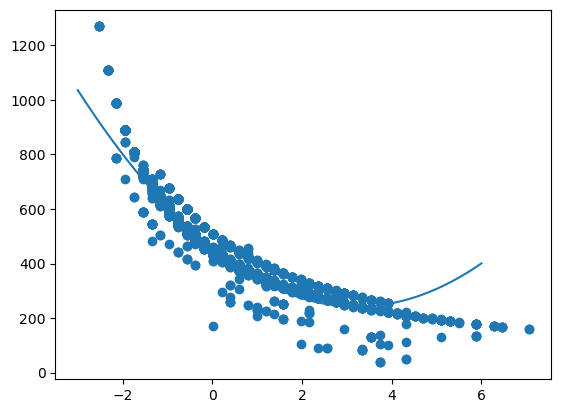

'Wait a minute, this has a better R2 than the previous model, which gives us more than 96% of confidence that the model fits the test data'

In [76]:
'''Just out of curiosity, I want to see how effective is the model if I use 'Std_Combined_MPG' alone to predict the CO2 emission by using quadratic regression model, 
because "In general, the more cylinders an engine possesses, the faster power can be generated. This often comes at a tradeoff in fuel efficiency. More power requires more fuel, which means you will end up paying significantly more for gas over the lifetime of your vehicle."
'''
#polynomial fit with degree = 2
test_model = np.poly1d(np.polyfit(vehicles_noyear['Std_Combined_MPG'], vehicles_noyear['CO2 Emission Grams/Mile'], 2))
print(test_model)
from sklearn.metrics import r2_score 
print(r2_score(vehicles_noyear['CO2 Emission Grams/Mile'], test_model(vehicles_noyear['Std_Combined_MPG'])))
polyline = np.linspace(-3, 6, 500) 
plt.scatter(vehicles_noyear['Std_Combined_MPG'], vehicles_noyear['CO2 Emission Grams/Mile']) 
plt.plot(polyline, test_model(polyline)) 
plt.show()
'''Wait a minute, this has a better R2 than the previous model, which gives us more than 96% of confidence that the quadratic regression model fits the test data, more than the multi-linear model we built before.'''


In [80]:
'''Then I also want to see if 'Std_Cylinders' can predict better by using linear regression model'''
test_model2 = LinearRegression()
test_result2 = test_model2.fit(vehicles_noyear[['Std_Combined_MPG']], vehicles_noyear['CO2 Emission Grams/Mile'])
test_result2.score(vehicles_noyear[['Std_Combined_MPG']], vehicles_noyear['CO2 Emission Grams/Mile'])
'''Okay, so R2 is about 85%, less than the 2 models above, which conclude my best fit model to be the 2nd quadratic regression, and the most effective predictor is 'Std_Combined_MPG'.'''

0.8579002325639428

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [81]:
# Your code here.
X = [1, 3, 4, 6, 8, 9, 11, 14]
Y = [1, 2, 4, 4, 5, 7, 8, 13]
invitation = pd.DataFrame({'people_invited': X, 'people_attended': Y})
invitation

,people_invited,people_attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [83]:
model_inv = LinearRegression()
result_inv = model_inv.fit(invitation[['people_invited']], invitation['people_attended'])
regression_inv = result_inv.intercept_ + result_inv.coef_*invitation['people_invited']

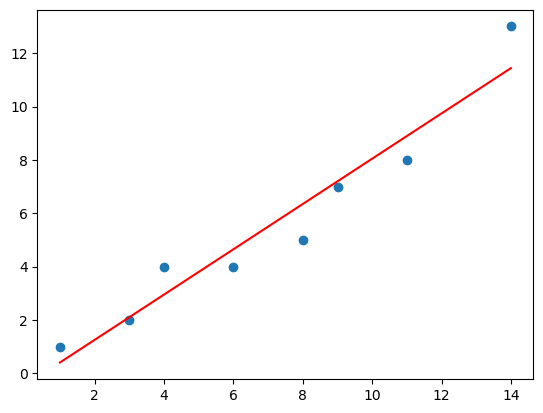

In [84]:
# Your code here.

plt.scatter(invitation['people_invited'], invitation['people_attended'])
plt.plot(invitation[['people_invited']],regression_inv, c ="red" )
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [86]:
# Your response here. 
print(result_inv.score(invitation[['people_invited']], invitation['people_attended']))
'''We see the linear regression model explains 93% of the data we tested. Therefore the two variables indeed have a very high correlation'''

0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [98]:
# Your response here. 
'''The last entry is slightly off the regression line. We try to remove the last entry as an outlier and test whether the model fits better '''
invitation.drop(7, inplace=True)

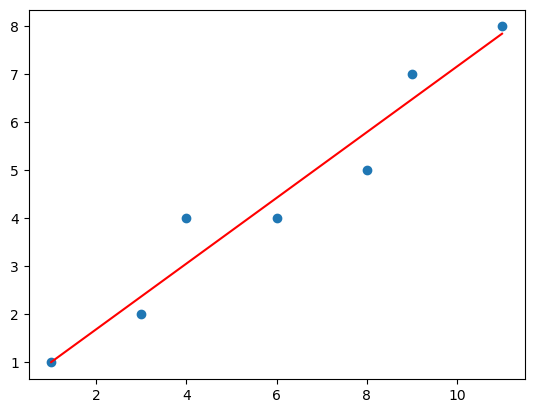

0.9433811802232854


In [101]:
model_inv = LinearRegression()
result_inv = model_inv.fit(invitation[['people_invited']], invitation['people_attended'])
regression_inv = result_inv.intercept_ + result_inv.coef_*invitation['people_invited']
plt.scatter(invitation['people_invited'], invitation['people_attended'])
plt.plot(invitation[['people_invited']],regression_inv, c ="red" )
plt.show()
print(result_inv.score(invitation[['people_invited']], invitation['people_attended']))
'''The R2 is now 1% higher'''

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
'''Previous line does not devide the entries evenly and this one does, literally 3 above and 3 below, one on the line'''